# Cleaning Data

At this stage, it is important to clean the 100x100data. 

Several issues were highlighted throughout the process.

### # of Finishers
As part of the analysis, DUV and ITRA finishers time were downloaded to verify runner's status and, if lucky, finishing time. 

When comparing the scraped 100x100 data to DUV and ITRA, it came to light that sometimes, runners are marked as finished on 100x100trail, although they did not get a finishers status on ITRA or DUV. THis required cleaning. 

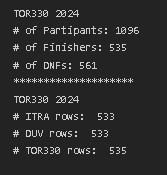

Furthermore, sometimes runners were given a status of not finished. THis was easily fixed by checking their timestamp at finish line (Courmayer). However, in that case, it was made sure that there was a timestamp for them between road sections

### Life bases / Refugees

Several cleaning methods were deployed to clean this column. There were 'RITIRIO' in some values, so this needed to be stripped and kept in a different column 

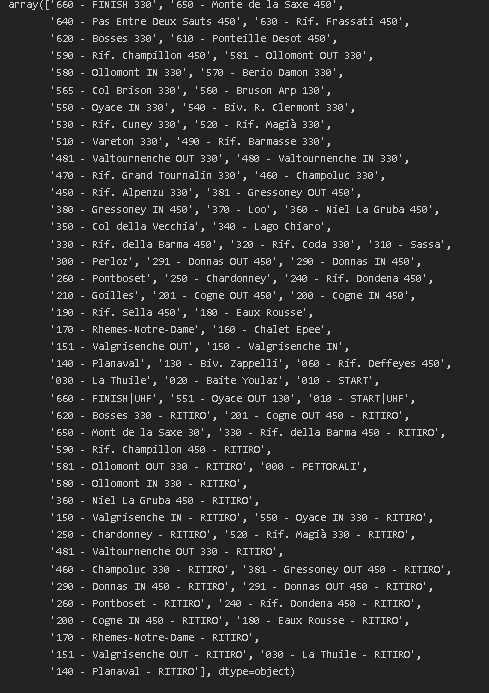


### 'Time' column
'Time' Column is one the most important columns in this process and needs to be meticulously cleaned for errors and inconsitencies!

The timesstamps had '+02:00' which was not necessary once inspected. 
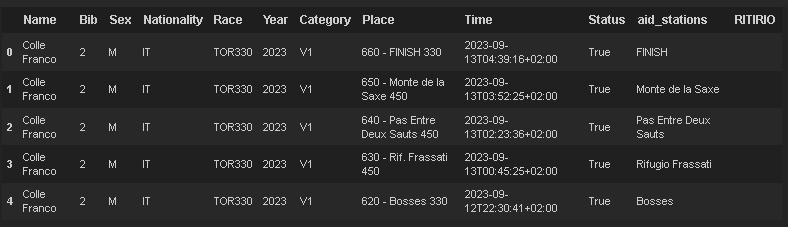


### Starting Time
Starting Times were also inaccurate. The starting time was set random times (who knows why?) but the times were changed to reflect wave start times!
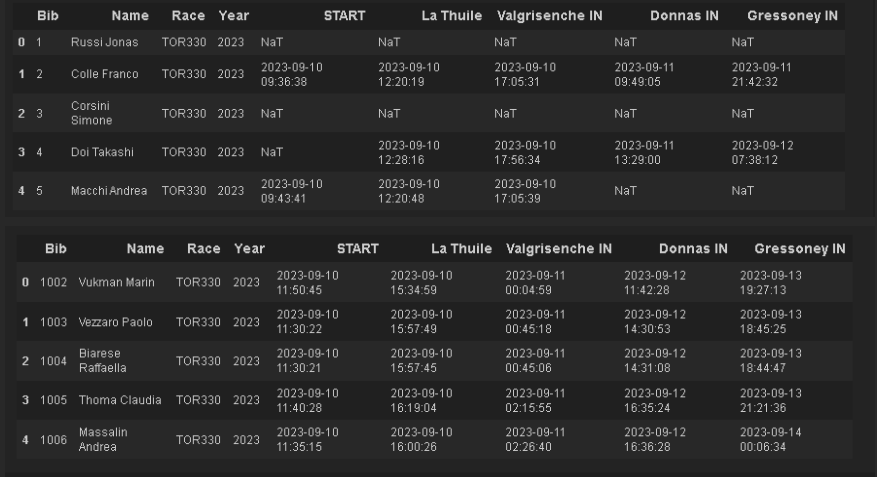

To deal with the Start Time, issue, DUV data was used to detect the start date for each year

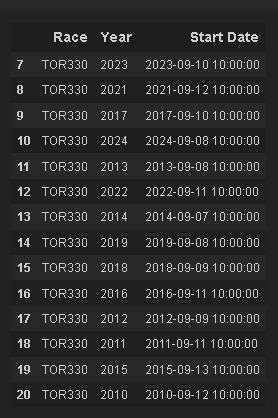

In [142]:
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
### FIX BARMASSE
### FIX BARMA

In [144]:
# # Set pandas options to display all columns and rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

## Looping through scraped data from 100X100trail

In [145]:
races = ['TOR330'
#         ,'TOR450'
        ]
years = [ #'2021',
#         '2022',
         '2023', 
#     '2024'
        ]

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50),

TOR330_2023 (42964, 10)
**************************************************


In [146]:
TORX_df_concat = pd.concat(TORX_df)

In [147]:
TOR330 = TORX_df_concat[TORX_df_concat['Year'] == year]
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2023 0  Colle Franco    2   M          IT  TOR330  2023       V1   
            1  Colle Franco    2   M          IT  TOR330  2023       V1   
            2  Colle Franco    2   M          IT  TOR330  2023       V1   
            3  Colle Franco    2   M          IT  TOR330  2023       V1   
            4  Colle Franco    2   M          IT  TOR330  2023       V1   

                                        Place                       Time  \
TOR330_2023 0                660 - FINISH 330  2023-09-13T04:39:16+02:00   
            1      650 - Monte de la Saxe 450  2023-09-13T03:52:25+02:00   
            2  640 - Pas Entre Deux Sauts 450  2023-09-13T02:23:36+02:00   
            3         630 - Rif. Frassati 450  2023-09-13T00:45:25+02:00   
            4                620 - Bosses 330  2023-09-12T22:30:41+02:00   

               Status  
TOR330_2023 0    True  
            1    True  
            2    True  
            3    True  
            4    True

In [148]:
def counting_finish_DNF_dataset(df):
    for year in years :
        for race in races:

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()))
                
                
                
                # Finishers
                print('# of Finishers:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  True)].unique()))
                # DNFs
                print('# of DNFs:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  False)].unique()))
                print('*'*20)
            else:
                pass
            
counting_finish_DNF_dataset(TOR330)

TOR330 2023
# of Partipants: 1206
# of Finishers: 630
# of DNFs: 576
********************


In [149]:
def counting_groupby_dataset(df, column):
    for year in years :
        for race in races:
            
            df = df[['Name', 'Status', 'Year', 'Race']].drop_duplicates()

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()), '\n')
                
                print(df.groupby([column])[column].count())
                print('*'*20)
            else:
                pass
counting_groupby_dataset(df,  'Status')

TOR330 2023
# of Partipants: 1206 

Status
False    576
True     630
Name: Status, dtype: int64
********************


### DUV and ITRA data


#### # of Finishers
As part of the analysis, DUV and ITRA finishers time were downloaded to verify runner's status and, if lucky, finishing time. 

When comparing the scraped 100x100 data to DUV and ITRA, it came to light that sometimes, runners are marked as finished on 100x100trail, although they did not get a finishers status on ITRA or DUV. THis required cleaning. 

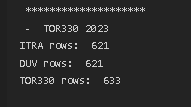


In [150]:
    TORX_duv_df = pd.read_excel(f'Database Data/TORX_duv_df.xlsx',
                                     dtype={'Start Date': 'string',
                                            'Year': 'string'})

    TORX_itra_no_DNF = pd.read_excel(f'Database Data/TORX_itra_no_DNF.xlsx',
                                     dtype={'Start Date': 'string',
                                           'Year': 'string'})

In [151]:
def find_out_the_rows_difference_between_datasets(df):
    for year in years :
        for race in races:
            if len(df['Name'][(df['Year'] == year)]) != 0:

                print(race, year)
                print('# ITRA rows: ', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                                  (TORX_itra_no_DNF['Race'] == race)].shape[0])
                print('# DUV rows: ',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                                  (TORX_duv_df['Race'] == race)].shape[0])

                print('# TOR330 rows: ', len(df['Name'][(df['Year'] == year) &
                                                 (df['Race'] == race) &
                                                 (df['Status'] == True)].unique()))
                print('\n', '*'*20)
                
                if year == '2022':
                    print(' - ','TOR330','2022')
                    print(TORX_itra_no_DNF[(TORX_itra_no_DNF['Race'] == 'TOR330') &
                          (TORX_itra_no_DNF['Year'] == '2022')].groupby(['Status'])['Status'].count())
                    print('\n', '*'*20)
            else: 
                pass

In [152]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2023
# of Partipants: 1206
# of Finishers: 630
# of DNFs: 576
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  630

 ********************
TOR330 2023
# of Partipants: 1206 

Status
False    576
True     630
Name: Status, dtype: int64
********************


### Cleaning Place column

In [153]:
TOR330['Place'].unique()

array(['660 - FINISH 330', '650 - Monte de la Saxe 450',
       '640 - Pas Entre Deux Sauts 450', '630 - Rif. Frassati 450',
       '620 - Bosses 330', '610 - Ponteille Desot 450',
       '590 - Rif. Champillon 450', '581 - Ollomont OUT 330',
       '580 - Ollomont IN 330', '570 - Berio Damon 330',
       '565 - Col Brison 330', '551 - Oyace OUT 330',
       '550 - Oyace IN 330', '540 - Biv. R. Clermont 330',
       '530 - Rif. Cuney 330', '520 - Rif. Magià 330',
       '490 - Rif. Barmasse 330', '481 - Valtournenche OUT 330',
       '480 - Valtournenche IN 330', '470 - Rif. Grand Tournalin 330',
       '460 - Champoluc 330', '450 - Rif. Alpenzu 330',
       '381 - Gressoney OUT 330', '380 - Gressoney IN 330', '370 - Loo',
       '360 - Niel La Gruba 450', '350 - Col della Vecchia',
       '340 - Lago Chiaro', '330 - Rif. della Barma 450',
       '320 - Rif. Coda 450', '310 - Sassa', '300 - Perloz',
       '291 - Donnas OUT 450', '290 - Donnas IN 330', '260 - Pontboset',
       '250 - 

In [154]:
# 030 - La Thuile - RITIRO
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Balma')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Niel - ','Niel ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Oyace IN','Oyace')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('  ',' ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Mont de la Saxe','Monte de la Saxe')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rifugio della Barmasse', 'Rifugio Barmasse')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Promoud','Bivacco Zappelli')
TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()
TOR330['RITIRIO'] = np.where(
    TOR330['aid_stations'].str.contains('RITIRO', na=False), 
    TOR330['aid_stations'],  '')
# TOR330['RITIRIO] =TOR330['RITIRIO].str.replace('- RITIRO', '')
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)
print(', '.join(list(TOR330['aid_stations'].unique())))


C:\Users\Karina\AppData\Local\Temp\ipykernel_13260\986193751.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Balma')
C:\Users\Karina\AppData\Local\Temp\ipykernel_13260\986193751.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_13260\986193751.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')


FINISH, Monte de la Saxe, Pas Entre Deux Sauts, Rifugio Frassati, Bosses, Ponteille Desot, Rifugio Champillon, Ollomont OUT, Ollomont IN, Berio Damon, Col Brison, Oyace OUT, Oyace, Bivacco R. Clermont, Rifugio Cuney, Rifugio Magià, Rifugio Barmasse, Valtournenche OUT, Valtournenche IN, Rifugio Grand Tournalin, Champoluc, Rifugio Alpenzu, Gressoney OUT, Gressoney IN, Loo, Niel La Gruba, Col della Vecchia, Lago Chiaro, Rifugio della Barma, Rifugio Coda, Sassa, Perloz, Donnas OUT, Donnas IN, Pontboset, Chardonney, Rifugio Dondena, Goilles, Cogne OUT, Cogne IN, Rifugio Sella, Eaux Rousse, Rhemes-Notre-Dame, Chalet Epee, Valgrisenche OUT, Valgrisenche IN, Planaval, Bivacco Zappelli, Rifugio Deffeyes, La Thuile, Baite Youlaz, START, PETTORALI, Parco Bollino, Bruson Arp, Vareton, Rifugio Miserin


In [155]:
# copy the column to make a new column
for i in list(TOR330['RITIRIO'].unique()):
    print(i)


Donnas IN - RITIRO
Rifugio Magià - RITIRO
Donnas OUT - RITIRO
Gressoney OUT - RITIRO
Ollomont OUT - RITIRO
Ollomont IN - RITIRO
Lago Chiaro - RITIRO
Oyace - RITIRO
Valtournenche OUT - RITIRO
Champoluc - RITIRO
Sassa - RITIRO
Rifugio della Barma - RITIRO
Gressoney IN - RITIRO
Niel La Gruba - RITIRO
Col della Vecchia - RITIRO
Chardonney - RITIRO
Valgrisenche OUT - RITIRO
Rifugio Dondena - RITIRO
Goilles - RITIRO
Cogne OUT - RITIRO
Cogne IN - RITIRO
Rifugio Sella - RITIRO
Eaux Rousse - RITIRO
Rhemes-Notre-Dame - RITIRO
Chalet Epee - RITIRO
Valgrisenche IN - RITIRO
La Thuile - RITIRO
Baite Youlaz - RITIRO


In [156]:
TOR330[~(TOR330['RITIRIO'].isnull())]

Name   Bib Sex Nationality    Race  \
TOR330_2023 0                  Colle Franco     2   M          IT  TOR330   
            1                  Colle Franco     2   M          IT  TOR330   
            2                  Colle Franco     2   M          IT  TOR330   
            3                  Colle Franco     2   M          IT  TOR330   
            4                  Colle Franco     2   M          IT  TOR330   
...                                     ...   ...  ..         ...     ...   
            42959  Jimenez Roqhuett Marcelo  1487   M          CR  TOR330   
            42960              Campion Mark  1505   M          GB  TOR330   
            42961             Torre Silvere  1520   M          FR  TOR330   
            42962         Vlatkovic Tatiana  1523   F          CH  TOR330   
            42963          Dohrmann Michael  1525   M          US  TOR330   

                   Year Category                           Place  \
TOR330_2023 0      2023       V1                660 - FINISH 330   
            1      2023       V1      650 - Monte de la Saxe 450   
            2      2023       V1  640 - Pas Entre Deux Sauts 450   
            3      2023       V1         630 - Rif. Frassati 450   
            4      2023       V1                620 - Bosses 330   
...                 ...      ...                             ...   
            42959  2023       V1                 000 - PETTORALI   
            42960  2023       V1                 000 - PETTORALI   
            42961  2023       V3                 000 - PETTORALI   
            42962  2023      SEN                 000 - PETTORALI   
            42963  2023       V1                 000 - PETTORALI   

                                        Time  Status          aid_stations  \
TOR330_2023 0      2023-09-13T04:39:16+02:00    True                FINISH   
            1      2023-09-13T03:52:25+02:00    True      Monte de la Saxe   
            2      2023-09-13T02:23:36+02:00    True  Pas Entre Deux Sauts   
            3      2023-09-13T00:45:25+02:00    True      Rifugio Frassati   
            4      2023-09-12T22:30:41+02:00    True                Bosses   
...                                      ...     ...                   ...   
            42959  2023-08-29T16:30:00+02:00   False             PETTORALI   
            42960  2023-08-29T16:30:00+02:00   False             PETTORALI   
            42961  2023-08-29T16:30:00+02:00   False             PETTORALI   
            42962  2023-08-29T16:30:00+02:00   False             PETTORALI   
            42963  2023-08-29T16:30:00+02:00   False             PETTORALI   

                  RITIRIO  
TOR330_2023 0              
            1              
            2              
            3              
            4              
...                   ...  
            42959          
            42960          
            42961          
            42962          
            42963          

[42964 rows x 12 columns]

### Cleaning Time column

Column '2024-09-11T07:08:32+02:00' needs to be fixed into '2024-09-11 07:08:32' and turned into the datetime

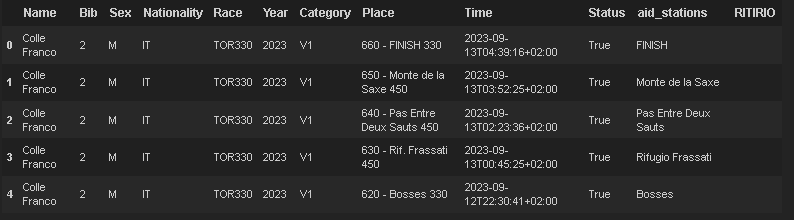

In [157]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# # NO NEED!!!
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2023 0  Colle Franco    2   M          IT  TOR330  2023       V1   
            1  Colle Franco    2   M          IT  TOR330  2023       V1   
            2  Colle Franco    2   M          IT  TOR330  2023       V1   
            3  Colle Franco    2   M          IT  TOR330  2023       V1   
            4  Colle Franco    2   M          IT  TOR330  2023       V1   

                                        Place                       Time  \
TOR330_2023 0                660 - FINISH 330  2023-09-13T04:39:16+02:00   
            1      650 - Monte de la Saxe 450  2023-09-13T03:52:25+02:00   
            2  640 - Pas Entre Deux Sauts 450  2023-09-13T02:23:36+02:00   
            3         630 - Rif. Frassati 450  2023-09-13T00:45:25+02:00   
            4                620 - Bosses 330  2023-09-12T22:30:41+02:00   

               Status          aid_stations RITIRIO            new_Time  
TOR330_2023 0    True                FINISH         2023-09-13 04:39:16  
            1    True      Monte de la Saxe         2023-09-13 03:52:25  
            2    True  Pas Entre Deux Sauts         2023-09-13 02:23:36  
            3    True      Rifugio Frassati         2023-09-13 00:45:25  
            4    True                Bosses         2023-09-12 22:30:41

In [158]:
for i in TOR330.aid_stations.unique():
    print(i)

FINISH
Monte de la Saxe
Pas Entre Deux Sauts
Rifugio Frassati
Bosses
Ponteille Desot
Rifugio Champillon
Ollomont OUT
Ollomont IN
Berio Damon
Col Brison
Oyace OUT
Oyace
Bivacco R. Clermont
Rifugio Cuney
Rifugio Magià
Rifugio Barmasse
Valtournenche OUT
Valtournenche IN
Rifugio Grand Tournalin
Champoluc
Rifugio Alpenzu
Gressoney OUT
Gressoney IN
Loo
Niel La Gruba
Col della Vecchia
Lago Chiaro
Rifugio della Barma
Rifugio Coda
Sassa
Perloz
Donnas OUT
Donnas IN
Pontboset
Chardonney
Rifugio Dondena
Goilles
Cogne OUT
Cogne IN
Rifugio Sella
Eaux Rousse
Rhemes-Notre-Dame
Chalet Epee
Valgrisenche OUT
Valgrisenche IN
Planaval
Bivacco Zappelli
Rifugio Deffeyes
La Thuile
Baite Youlaz
START
PETTORALI
Parco Bollino
Bruson Arp
Vareton
Rifugio Miserin


### PIVOTING the Dataset

In [159]:
# Pivot the data so that each participant has its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 
           'Nationality', 'Category', 'Race','Year', 'Status' , #'RITIRIO'
          ],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()


# pivoted_TOR330 = pivoted_TOR330.sort_values(by = 'Bib', ascending = True)
pivoted_TOR330.head()

aid_stations,Name,Bib,Sex,Nationality,Category,Race,Year,Status,Baite Youlaz,Berio Damon,...,Rifugio Miserin,Rifugio Sella,Rifugio della Barma,START,Sassa,Valgrisenche IN,Valgrisenche OUT,Valtournenche IN,Valtournenche OUT,Vareton
0,Abe Takashi,443,M,JP,V1,TOR330,2023,True,2023-09-10 12:32:30,2023-09-15 12:13:32,...,NaT,2023-09-11 17:49:52,2023-09-13 03:14:01,NaT,2023-09-12 20:07:44,2023-09-10 22:29:16,2023-09-11 01:27:00,2023-09-14 11:20:43,2023-09-14 16:38:25,2023-09-14 19:55:33
1,Acerbi Luca,1290,M,IT,V3,TOR330,2023,False,2023-09-10 15:26:07,NaT,...,NaT,NaT,NaT,2023-09-10 11:22:44,NaT,2023-09-11 04:16:59,NaT,NaT,NaT,NaT
2,Acerbi Maria Luisa,1234,F,IT,SEN,TOR330,2023,False,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Adamczyk Guillaume,1215,M,BE,V2,TOR330,2023,False,2023-09-10 15:30:04,NaT,...,NaT,NaT,NaT,2023-09-10 11:50:58,NaT,2023-09-11 06:20:04,NaT,NaT,NaT,NaT
4,Affre Roxane,1320,F,FR,V2,TOR330,2023,False,2023-09-10 16:00:38,NaT,...,NaT,NaT,NaT,2023-09-10 11:19:55,NaT,2023-09-11 06:25:00,NaT,NaT,NaT,NaT


In [160]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1206, 65)
Status
False    576
True     630
Name: Status, dtype: int64


In [161]:
# reordering columns 
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', #'RITIRIO',  
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    # 'Bivacco Zappelli', 'Col Brison', 'Berio Damon' # Dropping these because its not very useful anyway!
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace', 'Bruson Arp',   'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']]

pivoted_TOR330 = pivoted_TOR330.sort_values(by = 'Bib', ascending = True)
pivoted_TOR330.head()

aid_stations,Name,Bib,Sex,Nationality,Year,Race,Category,Status,START,Baite Youlaz,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
955,Russi Jonas,1,M,CH,2023,TOR330,SEN,False,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
224,Colle Franco,2,M,IT,2023,TOR330,V1,True,2023-09-10 09:36:38,2023-09-10 11:48:06,...,NaT,2023-09-12 17:57:48,2023-09-12 17:57:55,2023-09-12 19:36:02,2023-09-12 21:04:38,2023-09-12 22:30:41,2023-09-13 00:45:25,2023-09-13 02:23:36,2023-09-13 03:52:25,2023-09-13 04:39:16
243,Corsini Simone,3,M,IT,2023,TOR330,SEN,False,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
306,Doi Takashi,4,M,JP,2023,TOR330,V1,True,NaT,2023-09-10 11:54:54,...,2023-09-13 10:05:36,2023-09-13 12:01:36,2023-09-13 12:25:30,2023-09-13 14:39:25,2023-09-13 16:25:39,2023-09-13 18:06:33,2023-09-13 21:18:38,2023-09-13 23:50:12,2023-09-14 01:28:34,2023-09-14 02:20:44
634,Macchi Andrea,5,M,IT,2023,TOR330,SEN,False,2023-09-10 09:43:41,2023-09-10 11:47:59,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [162]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1206, 58)
Status
False    576
True     630
Name: Status, dtype: int64


### RITIRIO

Although every attempt was tried to include RITIRIO column in the dataset, it came to light that some people were twice marked retired. 

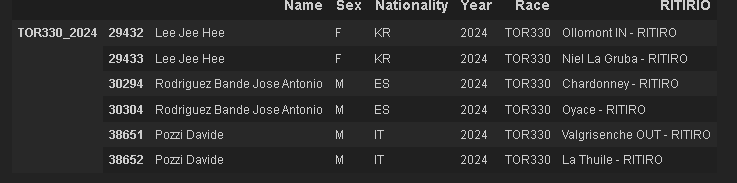

#### Solution
Do nothing. Dont reattach it to the pivoted dataset. It is useless anyway. Only 140 runners were marked as retired, very far from the DNF number.  

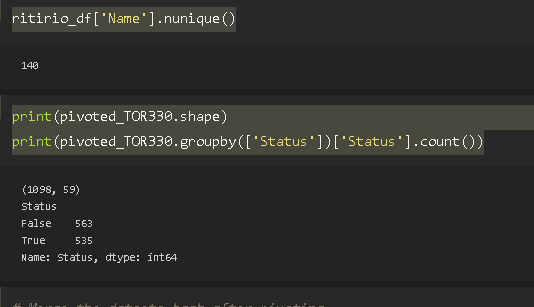

In [163]:
ritirio_df = TOR330[~(TOR330['RITIRIO'] == '')]
# ritirio_df = ritirio_df[['Bib', 'RITIRIO']]
ritirio_df.head()

Name   Bib Sex Nationality    Race  Year  \
TOR330_2023 73            Verjee Sabrina    48   F          GB  TOR330  2023   
            2381          Brumana Andrea    62   M          IT  TOR330  2023   
            7267      Hartmuth Katharina   665   F          CH  TOR330  2023   
            8901          Smith Jonathan  1321   M          AU  TOR330  2023   
            32389  Houteer Magni Justine   275   F          FR  TOR330  2023   

                  Category                             Place  \
TOR330_2023 73          V1      290 - Donnas IN 330 - RITIRO   
            2381        V1     520 - Rif. Magià 330 - RITIRO   
            7267       SEN      290 - Donnas IN 330 - RITIRO   
            8901        V2     291 - Donnas OUT 450 - RITIRO   
            32389       V1  381 - Gressoney OUT 330 - RITIRO   

                                        Time  Status   aid_stations  \
TOR330_2023 73     2023-09-11T14:00:51+02:00    True      Donnas IN   
            2381   2023-09-13T10:28:07+02:00    True  Rifugio Magià   
            7267   2023-09-11T14:00:58+02:00    True      Donnas IN   
            8901   2023-09-12T17:18:56+02:00    True     Donnas OUT   
            32389  2023-09-14T01:33:04+02:00    True  Gressoney OUT   

                                  RITIRIO            new_Time  
TOR330_2023 73         Donnas IN - RITIRO 2023-09-11 14:00:51  
            2381   Rifugio Magià - RITIRO 2023-09-13 10:28:07  
            7267       Donnas IN - RITIRO 2023-09-11 14:00:58  
            8901      Donnas OUT - RITIRO 2023-09-12 17:18:56  
            32389  Gressoney OUT - RITIRO 2023-09-14 01:33:04

In [164]:
# Get a list of duplicate names
duplicate_list = ritirio_df['Name'][ritirio_df['Name'].duplicated()].unique()

# Filter the DataFrame to only rows where 'Name' is in the duplicate list
duplicates_in_dataframe = ritirio_df[ritirio_df['Name'].isin(duplicate_list)]

# Display or process the result
duplicates_in_dataframe[['Name', 'Sex', 'Nationality', 'Year', 'Race', 'RITIRIO' ]]


Name Sex Nationality  Year    Race  \
TOR330_2023 36474    Nakajima Mizue   F          JP  2023  TOR330   
            36475    Nakajima Mizue   F          JP  2023  TOR330   
            36667       Brun Fabien   M          FR  2023  TOR330   
            36668       Brun Fabien   M          FR  2023  TOR330   
            36775  Higuchi Hiroyuki   M          JP  2023  TOR330   
            36776  Higuchi Hiroyuki   M          JP  2023  TOR330   

                                        RITIRIO  
TOR330_2023 36474        Gressoney OUT - RITIRO  
            36475                Sassa - RITIRO  
            36667        Gressoney OUT - RITIRO  
            36668  Rifugio della Barma - RITIRO  
            36775        Gressoney OUT - RITIRO  
            36776  Rifugio della Barma - RITIRO

In [165]:
ritirio_df['Name'].nunique()

132

In [166]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1206, 58)
Status
False    576
True     630
Name: Status, dtype: int64


In [167]:
# # Merge the datsets back after pivoting
# pivoted_TOR330 = pivoted_TOR330.merge(
#     ritirio_df[['Bib', 'RITIRIO']].drop_duplicates(),  # Ensure no duplicates in 'Bib' and 'RITIRIO'
#     on='Bib',
#     how='left'
# )

In [168]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1206, 58)
Status
False    576
True     630
Name: Status, dtype: int64


### Dealing with Anomalies

Several anomalies were spotted with the finish times. 

Some runners had a timestamp at the finish line, yet failed to be scanned Ollomont IN or OUT or any other refugee or checkpoints on the last stage. 


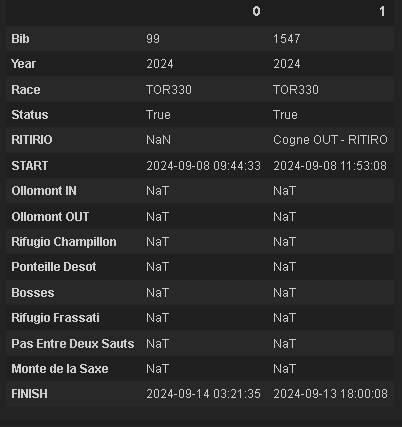

SOLUTION: change their status to FALSE and remove the timestamp

### 2023 Solution
9 participants were incorrectly labelled as finished!
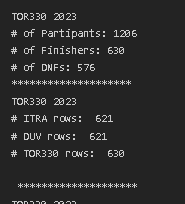

8 participants were identified as labelled finished and had a finish time but missed all stage 7 checkpoints
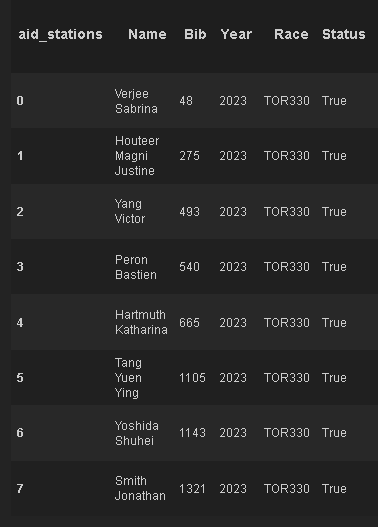



### 2024 Solution

In [169]:
# Looking for runners who have FINISHED< BUT have missing values for all last 3 checkpoints!
anomalies_df = pivoted_TOR330[(pivoted_TOR330['Status'] == True) &
               (pivoted_TOR330['Bosses'].isna()) &                
               (pivoted_TOR330['Rifugio Frassati'].isna()) & 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) &
               (pivoted_TOR330['Monte de la Saxe'].isna())]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status',  'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH']].reset_index(drop = True)

### Conclusion: Easily visible that there are several other places that have missing values 

aid_stations,Name,Bib,Year,Race,Status,START,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
0,Verjee Sabrina,48,2023,TOR330,True,2023-09-10 09:33:01,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-13 05:38:22
1,Houteer Magni Justine,275,2023,TOR330,True,2023-09-10 09:20:29,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-16 14:12:20
2,Yang Victor,493,2023,TOR330,True,2023-09-10 09:49:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-14 00:08:44
3,Peron Bastien,540,2023,TOR330,True,2023-09-10 09:32:59,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-13 20:12:12
4,Hartmuth Katharina,665,2023,TOR330,True,2023-09-10 09:27:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-15 08:58:31
5,Tang Yuen Ying,1105,2023,TOR330,True,2023-09-10 11:52:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-14 17:35:33
6,Yoshida Shuhei,1143,2023,TOR330,True,2023-09-10 11:39:57,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-16 17:07:25
7,Smith Jonathan,1321,2023,TOR330,True,2023-09-10 11:23:04,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2023-09-15 13:59:51


In [170]:
# EXECUTING SOLUTION
for name in anomalies_df['Name'].unique():  

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False

In [171]:
# Looking for runners who have FINISHED< BUT dont haave a finish time!
anomalies_df = pivoted_TOR330[((pivoted_TOR330['Status'] == True) 
#                               &(pivoted_TOR330['FINISH'] == pd.NaT) 
                              )&
                              
                              (
                                  (pivoted_TOR330['Bosses'].isna()) |                
               (pivoted_TOR330['Rifugio Frassati'].isna()) | 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) |
               (pivoted_TOR330['Monte de la Saxe'].isna())
                              )]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status',  'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH']]

### Conclusion: Easily visible that there are several other places that have missing values 

aid_stations,Name,Bib,Year,Race,Status,START,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
80,Bertrand Ludovic,190,2023,TOR330,True,2023-09-10 09:27:13,2023-09-15 16:49:39,2023-09-15 18:58:30,2023-09-15 21:26:58,2023-09-16 01:12:28,2023-09-16 04:49:52,2023-09-16 08:32:26,NaT,2023-09-16 14:57:31,2023-09-16 15:50:53
882,Pupier Samuel,310,2023,TOR330,True,2023-09-10 09:26:21,2023-09-15 14:58:35,2023-09-15 17:24:12,2023-09-15 19:36:02,2023-09-15 23:11:20,2023-09-16 02:54:04,NaT,2023-09-16 10:13:44,2023-09-16 12:29:40,2023-09-16 13:55:31
807,Parra Hernandez Vicente ( Tito),658,2023,TOR330,True,2023-09-10 09:24:35,2023-09-13 17:39:03,2023-09-13 18:24:25,2023-09-13 20:12:45,2023-09-13 22:22:38,2023-09-14 00:35:51,2023-09-14 03:46:25,2023-09-14 07:16:29,NaT,2023-09-14 09:26:12
29,Arnus Matej,1023,2023,TOR330,True,2023-09-10 11:50:16,2023-09-15 18:25:45,2023-09-15 20:51:57,NaT,2023-09-16 02:26:03,2023-09-16 05:49:02,2023-09-16 10:06:33,NaT,2023-09-16 15:26:22,2023-09-16 16:52:17
708,Mondin Placido,1155,2023,TOR330,True,2023-09-10 11:22:22,2023-09-15 18:38:55,2023-09-15 20:07:43,NaT,2023-09-16 03:40:47,2023-09-16 06:41:41,2023-09-16 10:11:26,NaT,2023-09-16 17:06:09,2023-09-16 20:05:50
1011,Slobodzian Fabien,1170,2023,TOR330,True,2023-09-10 11:29:39,2023-09-15 15:57:01,NaT,2023-09-15 19:59:07,2023-09-15 23:11:28,2023-09-16 03:31:01,2023-09-16 09:13:30,NaT,2023-09-16 15:19:13,2023-09-16 17:03:30
1059,Tanaka Yoshikazu,1219,2023,TOR330,True,2023-09-10 11:29:37,2023-09-15 17:23:46,2023-09-15 20:28:03,NaT,2023-09-16 02:57:20,2023-09-16 05:35:45,2023-09-16 09:09:39,NaT,2023-09-16 14:43:13,2023-09-16 16:13:06
206,Cheung Ming Fung,1311,2023,TOR330,True,NaT,2023-09-15 18:50:14,2023-09-15 20:53:50,NaT,2023-09-16 02:00:11,2023-09-16 04:36:26,2023-09-16 09:22:07,NaT,2023-09-16 14:31:01,2023-09-16 15:26:37
441,Gostan Bojana,1469,2023,TOR330,True,2023-09-10 11:50:16,2023-09-15 18:25:43,2023-09-15 20:52:03,NaT,2023-09-16 02:25:54,2023-09-16 05:49:24,2023-09-16 10:06:29,NaT,2023-09-16 15:26:26,2023-09-16 16:52:07
1170,Wu Yihua,1514,2023,TOR330,True,2023-09-10 11:37:48,2023-09-15 03:40:06,2023-09-15 07:19:56,2023-09-15 09:07:56,2023-09-15 11:23:57,2023-09-15 13:14:06,2023-09-15 17:01:51,2023-09-15 19:15:45,NaT,2023-09-15 22:12:44


In [ ]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

### Start Line Issues

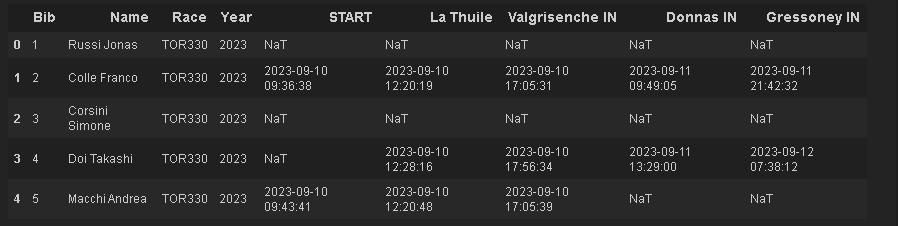

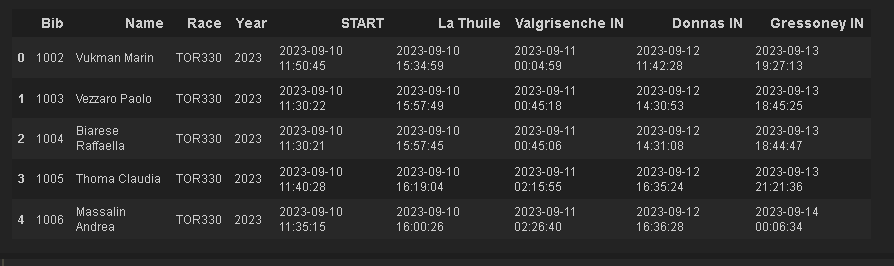

START times are all over the place and this is a MAJOR issue! 
It is important because if the start is not cleaned, it will affet the race finishing time and all the durations in between. 


#### SOLUTION
1) Made a new TIME column from DUV dates

2) added start times based on the wave (based on the bib)

##### Reading in TORX dates extracted from DUV

In [31]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


In [32]:
dates_duv_df[dates_duv_df['Race'] =='TOR330']

,Race,Year,Start Date
7,TOR330,2023,2023-09-10 10:00:00
8,TOR330,2021,2021-09-12 10:00:00
9,TOR330,2017,2017-09-10 10:00:00
10,TOR330,2024,2024-09-08 10:00:00
11,TOR330,2013,2013-09-08 10:00:00
12,TOR330,2022,2022-09-11 10:00:00
13,TOR330,2014,2014-09-07 10:00:00
14,TOR330,2019,2019-09-08 10:00:00
15,TOR330,2018,2018-09-09 10:00:00
16,TOR330,2016,2016-09-11 10:00:00


### Adding dates into TOR330

In [33]:
# making sure both columns are years!
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



(1206, 58)
(1206, 59)


In [34]:
# Following the assumption that every bib prior to 1001 starts at 10:00:00
pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

# Following the assumption that every bib from 1001 onwards starts at 12:00:00
pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] <= 1001, 
        'Wave1', 
        'Wave2')

In [35]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']< 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1,Russi Jonas,TOR330,2023,2023-09-10 10:00:00,NaT,NaT,NaT,NaT
1,2,Colle Franco,TOR330,2023,2023-09-10 10:00:00,2023-09-10 12:20:19,2023-09-10 17:05:31,2023-09-11 09:49:05,2023-09-11 21:42:32
2,3,Corsini Simone,TOR330,2023,2023-09-10 10:00:00,NaT,NaT,NaT,NaT
3,4,Doi Takashi,TOR330,2023,2023-09-10 10:00:00,2023-09-10 12:28:16,2023-09-10 17:56:34,2023-09-11 13:29:00,2023-09-12 07:38:12
4,5,Macchi Andrea,TOR330,2023,2023-09-10 10:00:00,2023-09-10 12:20:48,2023-09-10 17:05:39,NaT,NaT


In [36]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']> 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

,Bib,Name,Race,Year,new_Start Date,La Thuile,Valgrisenche IN,Donnas IN,Gressoney IN
0,1002,Vukman Marin,TOR330,2023,2023-09-10 12:00:00,2023-09-10 15:34:59,2023-09-11 00:04:59,2023-09-12 11:42:28,2023-09-13 19:27:13
1,1003,Vezzaro Paolo,TOR330,2023,2023-09-10 12:00:00,2023-09-10 15:57:49,2023-09-11 00:45:18,2023-09-12 14:30:53,2023-09-13 18:45:25
2,1004,Biarese Raffaella,TOR330,2023,2023-09-10 12:00:00,2023-09-10 15:57:45,2023-09-11 00:45:06,2023-09-12 14:31:08,2023-09-13 18:44:47
3,1005,Thoma Claudia,TOR330,2023,2023-09-10 12:00:00,2023-09-10 16:19:04,2023-09-11 02:15:55,2023-09-12 16:35:24,2023-09-13 21:21:36
4,1006,Massalin Andrea,TOR330,2023,2023-09-10 12:00:00,2023-09-10 16:00:26,2023-09-11 02:26:40,2023-09-12 16:36:28,2023-09-14 00:06:34


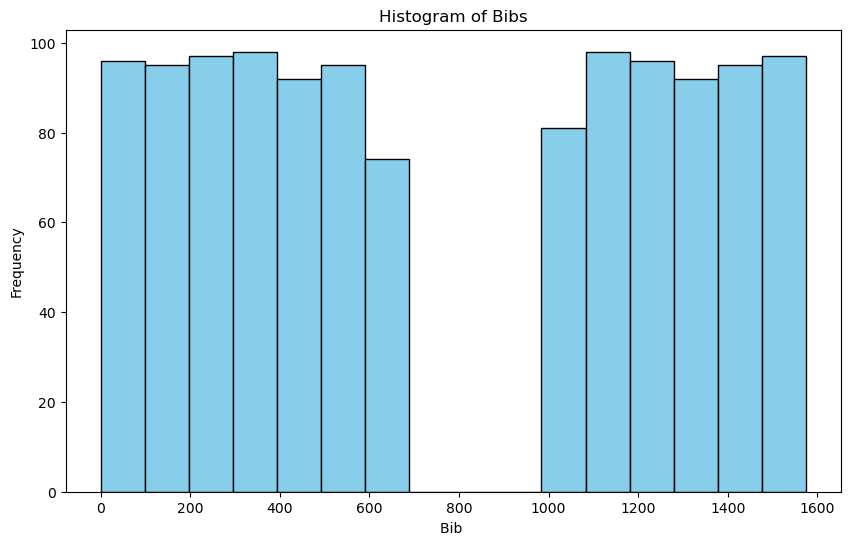

In [37]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pivoted_TOR330_dates['Bib'], bins=16, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Bibs')
plt.xlabel('Bib ')
plt.ylabel('Frequency')
plt.show()

In [38]:
### WHich wave is more likely to finish? 
### Wave 1 seems to have way more finishers - they do have a higher ITRA score, meaning that they are more
### experienced and stronger than Wave 2..
pivoted_TOR330_dates.groupby(['Wave', 'Status'])['Status'].size()

Wave   Status
Wave1  False     239
       True      409
Wave2  False     345
       True      213
Name: Status, dtype: int64

### Calculating Duration - THE MOST IMPORTANT!

In [39]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')


Processing column: Duration
1     2 days 18:39:16
643   2 days 21:49:38
5     2 days 23:22:30
19    3 days 00:04:07
629   3 days 00:16:06
Name: Duration, dtype: timedelta64[ns]


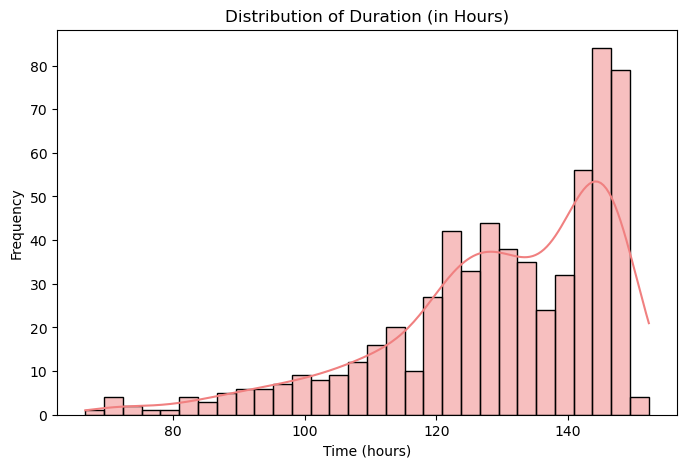

In [40]:
print(f"Processing column: Duration")
print(pivoted_TOR330_dates['Duration'].head())


pivoted_TOR330_dates['Duration']
# Convert to timedelta and get total hours (handling NaT)
pivoted_TOR330_dates['Duration_hours'] = pd.to_timedelta(
    pivoted_TOR330_dates['Duration'], errors='coerce'
).dt.total_seconds() / 3600  # Convert seconds to hours

# Drop NaN values for histogram visualization
data_to_plot = pivoted_TOR330_dates['Duration_hours'].dropna()

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_to_plot, kde=True, bins=30, color="lightcoral")
plt.ticklabel_format(style='plain', axis='x')
plt.title(f"Distribution of Duration (in Hours)")
plt.xlabel("Time (hours)")
plt.ylabel("Frequency")
plt.show()


In [41]:
# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 
        'Category', 'Status','Wave', 'Duration', # MOVING DURATION CLOSER TO THE START SO I CAN SEE IT!
        
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
         'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
        'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace', 'Bruson Arp', 
         'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]

### Checking accuracy of the Duration calculation

Because of issues with Start Date, it was thought that it would be a good idea to try and compare the DUV and ITRA duration time to establish accuracy of the calculation...

There are issues with the names, so some will be not be successfully merged.

In [42]:
# print(pivoted_TOR330_dates['Duration'][pivoted_TOR330_dates['Name'].str.contains('Jonina')])
# # print(TORX_duv_df['Performance'][TORX_duv_df['Name'].str.contains('Jonina')])
# # Finished in 144:46:43 hours and 

In [43]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2023
# of Partipants: 1206
# of Finishers: 622
# of DNFs: 584
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  622

 ********************
TOR330 2023
# of Partipants: 1206 

Status
False    584
True     622
Name: Status, dtype: int64
********************


## extracting DNF and FInisher's for more cleaning!

In [44]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[
                        # extracting runners whose status is True (Finished)
                        (pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()


In [45]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[
                    # selecting all rows that DNFed
                    (pivoted_TOR330_dates['Status'] == False) & # AND
                    # selecting all rows where FINISH does not have a time
                    (pivoted_TOR330_dates['FINISH'].isna())]

In [46]:
print(pivoted_TOR330_dates_noDNF.shape)
print(pivoted_TOR330_dates_DNF.shape)
print('MUST ADD UP TO:')
print(pivoted_TOR330_dates.shape)

(622, 61)
(584, 60)
MUST ADD UP TO:
(1206, 60)


### FINISHER'S Missing Timestamps
From time to time, timestamps are missing, even for finishers. Here is the missing values count for all finishers. 

THis is could be for several issues:
1) Participant's Fatigue - they forget to ask to be scanned

2) Volunteer's Fatigue - they forget to scan participants /  they thought they had already scanned the runer

3) Technology Failure - something goes wrong... ?
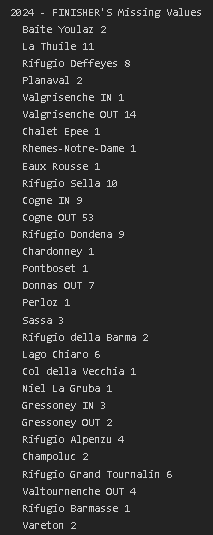

This is just a screenshot, more can be seen below!

In [47]:
print(f'{year} - FINISHER\'S Timestamp Missing Values')
for i in pivoted_TOR330_dates_noDNF.columns:
    missing_value_count =  pivoted_TOR330_dates_noDNF[i].isna().sum()
    
    if missing_value_count != 0:
        print(' ',i,missing_value_count)


2023 - FINISHER'S Timestamp Missing Values
  Baite Youlaz 1
  La Thuile 1
  Rifugio Deffeyes 1
  Valgrisenche OUT 1
  Chalet Epee 5
  Rhemes-Notre-Dame 2
  Rifugio Sella 148
  Cogne IN 3
  Cogne OUT 31
  Goilles 1
  Rifugio Dondena 7
  Pontboset 7
  Donnas IN 4
  Donnas OUT 9
  Perloz 2
  Sassa 5
  Rifugio della Barma 2
  Lago Chiaro 8
  Col della Vecchia 4
  Niel La Gruba 1
  Gressoney OUT 3
  Rifugio Alpenzu 1
  Champoluc 1
  Rifugio Grand Tournalin 4
  Valtournenche OUT 5
  Rifugio Barmasse 2
  Vareton 3
  Rifugio Magià 2
  Rifugio Cuney 2
  Bruson Arp 10
  Ollomont IN 5
  Ollomont OUT 16
  Rifugio Champillon 32
  Ponteille Desot 2
  Rifugio Frassati 1
  Pas Entre Deux Sauts 9
  Monte de la Saxe 2


### DNFs 

In [48]:
#### What missing values are there? 
### Some missing value is okay due to the fact that they DNFed so they wont have a timestamp
pivoted_TOR330_dates_DNF.isna().sum()

Name                         0
Bib                          0
Sex                          0
Nationality                  0
Year                         0
Race                         0
Category                     0
Status                       0
Wave                         0
Duration                   584
new_Start Date               0
Baite Youlaz               117
La Thuile                  119
Rifugio Deffeyes           131
Planaval                   149
Valgrisenche IN            155
Valgrisenche OUT           202
Chalet Epee                248
Rhemes-Notre-Dame          222
Eaux Rousse                253
Rifugio Sella              334
Cogne IN                   316
Cogne OUT                  347
Goilles                    344
Rifugio Dondena            353
Chardonney                 353
Pontboset                  363
Donnas IN                  358
Donnas OUT                 362
Perloz                     374
Sassa                      384
Rifugio Coda               391
Rifugio 

### What is the last place that DNFers reached?

In [49]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
#     return None  # In case all columns are blank

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)


In [50]:
pivoted_TOR330_dates = pivoted_TOR330_dates[['Name', 'Bib',
                                                     'Sex', 'Nationality',
                                                     'Year', 'Race', 
                                                     'Category', 'Status', 'Wave', 'Duration', 
                                                      'Retired', # putting retired at the from and not the back
                                                     'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
       'Bruson Arp',   'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

In [51]:
# creating a dataset to examine DNFs in the excel
pivoted_TOR330_dates_DNF_for_excel = pivoted_TOR330_dates_DNF.copy().drop(columns=['Sex', 'Nationality',
                                                          'Category', 'Status', 
                                                          'Wave', 'Duration'])    
# for year in years:
#     pivoted_TOR330_dates_DNF_for_excel.to_excel(f'TOR330 Data/DNF/DNF_df_{year}.xlsx', index = False)


In [52]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == True].head(1)

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Bruson Arp,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH
1,Colle Franco,2,M,IT,2023,TOR330,V1,True,Wave1,2 days 18:39:16,...,NaT,2023-09-12 17:57:48,2023-09-12 17:57:55,2023-09-12 19:36:02,2023-09-12 21:04:38,2023-09-12 22:30:41,2023-09-13 00:45:25,2023-09-13 02:23:36,2023-09-13 03:52:25,2023-09-13 04:39:16


### Issues with Last location Detected
Some people who too far of a distance between last lifebase /  refuge / checkpoint for it to be an accurate representation of their last location. 

2023
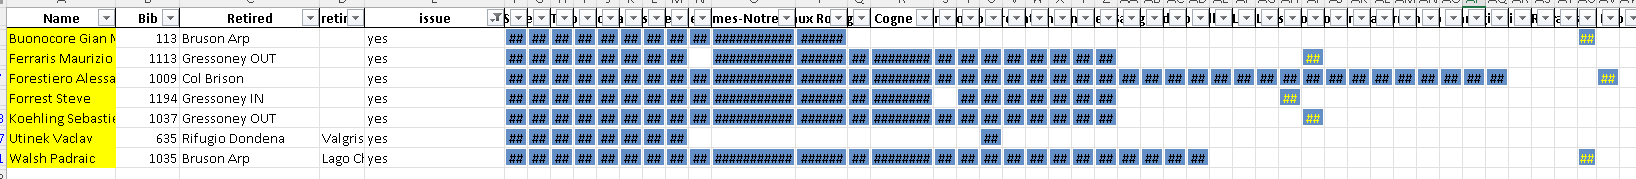

2024

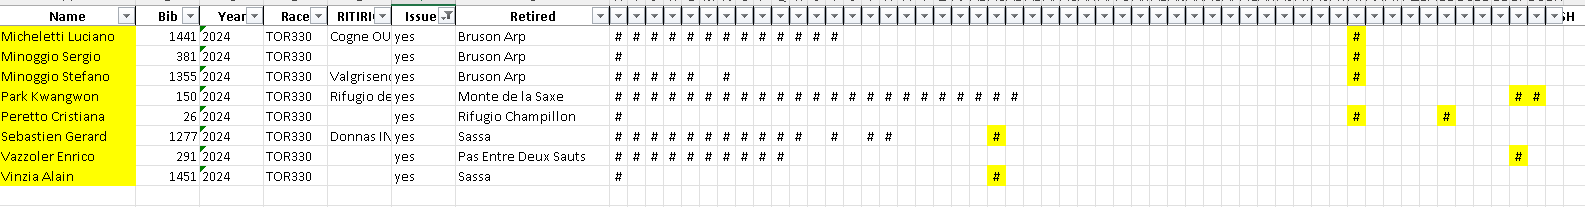

##### Solution
Create a loop that would clean those timestamps.

In [53]:
try:
    if year == '2023':

        names_that_DNFed_and_then_popped_up_miles_away =['Utinek Vaclav', 'Walsh Padraic',
                                                        'Ferraris Maurizio', 
    # 'Buonocore Gian Mario', 'Forestiero Alessandro', ## Have 2 timestamps of time travel
                                                         'Forrest Steve','Koehling Sebastien'
                                                        ]
        retired_list = list(pivoted_TOR330_dates['Retired'][
            pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())
        print(retired_list)

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            retired_column = row['Retired']  # Get the column name in 'Retired'


            if retired_column in retired_list:
                pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        # Prepending 'Name' and 'Bib' to the list
        retired_list = ['Name', 'Bib'] + retired_list  + ['Retired']
        print(retired_list)

    elif year == '2024':
        names_that_DNFed_and_then_popped_up_miles_away =['Micheletti Luciano', 'Minoggio Sergio','Minoggio Stefano', 
                                                        'Park Kwangwon',  ## Has 2 time teleportation 
                                                        'Peretto Cristiana', ## Has 2 time teleportation 
                                                        'Sebastien Gerard', 'Vazzoler Enrico', 'Vinzia Alain']

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            # Get the column name in 'Retired'
            retired_column = row['Retired']

            retired_list = list(pivoted_TOR330_dates['Retired'][
                pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())

            if row['Name'] == 'Park Kwangwon':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Pas Entre Deux Sauts'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Monte de la Saxe'] = pd.NaT

            elif row['Name'] == 'Peretto Cristiana':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Rifugio Champillon'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Bruson Arp'] = pd.NaT

            else:

                if retired_column in retired_list:
                    pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        retired_list = ['Name', 'Bib'] + retired_list + ['Retired']
        print(retired_list)

     # Display the updated DataFrame
    pivoted_TOR330_dates[retired_list][pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]

except:
    pass

['Rifugio Dondena', 'Bruson Arp', 'Gressoney OUT', 'Gressoney IN']
['Name', 'Bib', 'Rifugio Dondena', 'Bruson Arp', 'Gressoney OUT', 'Gressoney IN', 'Retired']


In [54]:
# Dropping the column retired otherwise it is going to think that RETIRED is the last column
pivoted_TOR330_dates = pivoted_TOR330_dates.drop(columns=['Retired'])    

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)

In [55]:
pivoted_TOR330_dates.head()

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ollomont IN,Ollomont OUT,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired
1,Colle Franco,2,M,IT,2023,TOR330,V1,True,Wave1,2 days 18:39:16,...,2023-09-12 17:57:48,2023-09-12 17:57:55,2023-09-12 19:36:02,2023-09-12 21:04:38,2023-09-12 22:30:41,2023-09-13 00:45:25,2023-09-13 02:23:36,2023-09-13 03:52:25,2023-09-13 04:39:16,NaN
643,Romain Olivier,662,M,FR,2023,TOR330,SEN,True,Wave1,2 days 21:49:38,...,2023-09-12 18:42:27,2023-09-12 19:18:53,2023-09-12 20:52:03,2023-09-12 22:37:52,2023-09-13 00:19:25,2023-09-13 03:29:59,2023-09-13 05:45:09,2023-09-13 07:13:28,2023-09-13 07:49:38,NaN
5,Reynolds Galen,6,M,CA,2023,TOR330,SEN,True,Wave1,2 days 23:22:30,...,2023-09-12 22:44:14,2023-09-12 23:12:37,2023-09-13 00:32:25,2023-09-13 01:52:21,2023-09-13 03:10:12,2023-09-13 05:36:50,2023-09-13 07:12:51,2023-09-13 08:41:42,2023-09-13 09:22:30,NaN
19,Hall Damian,20,M,GB,2023,TOR330,V1,True,Wave1,3 days 00:04:07,...,2023-09-12 22:44:22,2023-09-12 23:12:43,2023-09-13 00:36:43,2023-09-13 01:59:30,2023-09-13 03:33:35,2023-09-13 06:28:38,2023-09-13 08:03:24,2023-09-13 09:29:29,2023-09-13 10:04:07,NaN
629,Galeati Gianluca,647,M,IT,2023,TOR330,V1,True,Wave1,3 days 00:16:06,...,2023-09-12 22:42:45,2023-09-12 23:04:24,2023-09-13 00:39:06,2023-09-13 02:09:40,2023-09-13 03:58:37,2023-09-13 06:28:51,2023-09-13 08:04:05,2023-09-13 09:33:49,2023-09-13 10:16:06,NaN


###  Unpredictable Weather of 2022 
In 2022, due to the weather,  the race directors decided to stop the race at Bosses and Refuge Frassati.  

In [56]:
pivoted_TOR330_dates['Status1'] = pivoted_TOR330_dates['Status'].astype('str')
# print(pivoted_TOR330_dates['Status1'].unique())

for year in years:
    if year == '2022':
        # Update 'Status1' for year 2022
        pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ] = pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ].str.replace('True', 'Finished')

        # For finishers at Bosses
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ].str.replace('False', 'Finished at Bosses')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Rifugio Frassati')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Rifugio Frassati')

        
        
        # All other DNFs
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ].str.replace('False', 'DNFs')
        
        
        
        
        
    else:
        
        print(year)
        # Update 'Status1' for years other than 2022
        pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1'] = (
            pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1']
            .str.replace('True', 'Finished')
            .str.replace('False', 'DNF')
        )
        print(pivoted_TOR330_dates['Status1'].unique())


2023
['Finished' 'DNF']


In [57]:
pivoted_TOR330_dates['Status1'].unique()

array(['Finished', 'DNF'], dtype=object)

In [58]:
counting_finish_DNF_dataset(pivoted_TOR330_dates)
find_out_the_rows_difference_between_datasets(pivoted_TOR330_dates)
pivoted_TOR330_dates.groupby('Status1')['Status1'].count()

TOR330 2023
# of Partipants: 1206
# of Finishers: 622
# of DNFs: 584
********************
TOR330 2023
# ITRA rows:  621
# DUV rows:  621
# TOR330 rows:  622

 ********************


Status1
DNF         584
Finished    622
Name: Status1, dtype: int64

In [59]:
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

### Where did the DNFs occur?

In [60]:
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' IN', '')
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' OUT', '')

In [61]:
section1 = ['Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
             'Planaval', 'Valgrisenche']
section2 = [ 'Chalet Epee', 'Rhemes-Notre-Dame',
            'Eaux Rousse', 'Rifugio Sella', 'Cogne']

section3 = [ 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas']
section4  = ['Perloz', 'Sassa', 'Rifugio Coda',
            'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
            'Niel La Gruba', 'Loo', 'Gressoney']

section5 = ['Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche'] 

section6 = [ 'Vareton', 'Rifugio Barmasse',
            'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
            'Bruson Arp',   'Ollomont']
        
section7 = [ 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
            'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
            'FINISH']

# finding the low / high season by date
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section1), 'Retired_Section'] = 'Section 1'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section2), 'Retired_Section'] = 'Section 2'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section3), 'Retired_Section'] = 'Section 3'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section4), 'Retired_Section'] = 'Section 4'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section5), 'Retired_Section'] = 'Section 5'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section6), 'Retired_Section'] = 'Section 6'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section7), 'Retired_Section'] = 'Section 7'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Retired_Section'] = 'DNS'
pivoted_TOR330_dates[(pivoted_TOR330_dates['Retired'].isnull())]

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Section
1,Colle Franco,2,M,IT,2023,TOR330,V1,True,Wave1,2 days 18:39:16,...,2023-09-12 19:36:02,2023-09-12 21:04:38,2023-09-12 22:30:41,2023-09-13 00:45:25,2023-09-13 02:23:36,2023-09-13 03:52:25,2023-09-13 04:39:16,NaN,Finished,NaN
643,Romain Olivier,662,M,FR,2023,TOR330,SEN,True,Wave1,2 days 21:49:38,...,2023-09-12 20:52:03,2023-09-12 22:37:52,2023-09-13 00:19:25,2023-09-13 03:29:59,2023-09-13 05:45:09,2023-09-13 07:13:28,2023-09-13 07:49:38,NaN,Finished,NaN
5,Reynolds Galen,6,M,CA,2023,TOR330,SEN,True,Wave1,2 days 23:22:30,...,2023-09-13 00:32:25,2023-09-13 01:52:21,2023-09-13 03:10:12,2023-09-13 05:36:50,2023-09-13 07:12:51,2023-09-13 08:41:42,2023-09-13 09:22:30,NaN,Finished,NaN
19,Hall Damian,20,M,GB,2023,TOR330,V1,True,Wave1,3 days 00:04:07,...,2023-09-13 00:36:43,2023-09-13 01:59:30,2023-09-13 03:33:35,2023-09-13 06:28:38,2023-09-13 08:03:24,2023-09-13 09:29:29,2023-09-13 10:04:07,NaN,Finished,NaN
629,Galeati Gianluca,647,M,IT,2023,TOR330,V1,True,Wave1,3 days 00:16:06,...,2023-09-13 00:39:06,2023-09-13 02:09:40,2023-09-13 03:58:37,2023-09-13 06:28:51,2023-09-13 08:04:05,2023-09-13 09:33:49,2023-09-13 10:16:06,NaN,Finished,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,Tora Lodovico,418,M,IT,2023,TOR330,V2,True,Wave1,6 days 05:18:23,...,2023-09-15 21:39:51,2023-09-16 01:52:50,2023-09-16 04:04:19,2023-09-16 07:39:05,2023-09-16 11:18:26,2023-09-16 14:00:49,2023-09-16 15:18:23,NaN,Finished,NaN
575,Tsui Stella,593,F,SG,2023,TOR330,SEN,True,Wave1,6 days 05:44:12,...,NaT,2023-09-16 02:41:44,2023-09-16 05:55:16,2023-09-16 09:06:52,2023-09-16 12:15:06,2023-09-16 14:27:02,2023-09-16 15:44:12,NaN,Finished,NaN
184,Bertrand Ludovic,190,M,FR,2023,TOR330,V2,True,Wave1,6 days 05:50:53,...,2023-09-15 21:26:58,2023-09-16 01:12:28,2023-09-16 04:49:52,2023-09-16 08:32:26,NaT,2023-09-16 14:57:31,2023-09-16 15:50:53,NaN,Finished,NaN
800,Mondin Placido,1155,M,IT,2023,TOR330,V1,True,Wave2,6 days 08:05:50,...,NaT,2023-09-16 03:40:47,2023-09-16 06:41:41,2023-09-16 10:11:26,NaT,2023-09-16 17:06:09,2023-09-16 20:05:50,NaN,Finished,NaN


In [62]:
# making sure that I caught all aid stations!!!!
pivoted_TOR330_dates[
    (pivoted_TOR330_dates['Status'] == False) &
    
    (pivoted_TOR330_dates['Retired_Section'].isnull())
                    ]

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Rifugio Champillon,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Section


In [63]:
pivoted_TOR330_dates['Retired_Section'].unique()

array([nan, 'DNS', 'Section 3', 'Section 2', 'Section 4', 'Section 6',
       'Section 1', 'Section 5', 'Section 7'], dtype=object)

In [64]:
# finding the pre-post Gressoney
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 1' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 2' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 3' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 4' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 5' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 6' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 7' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Pre-Post Gressoney'] = 'Pre Gressoney'


In [65]:
pivoted_TOR330_dates.groupby('Pre-Post Gressoney')['Pre-Post Gressoney'].count()

Pre-Post Gressoney
Post Gressoney     64
Pre Gressoney     520
Name: Pre-Post Gressoney, dtype: int64

In [66]:
pivoted_TOR330_dates.groupby('Retired_Section')['Retired_Section'].count()

Retired_Section
DNS          116
Section 1     99
Section 2    128
Section 3     30
Section 4    147
Section 5     19
Section 6     37
Section 7      8
Name: Retired_Section, dtype: int64

In [67]:
counting_retired_section_and_wave = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].groupby(['Retired_Section', 'Wave'] ).size().to_frame()

# Reset the index to make it more readable
counting_retired_section_and_wave.index = pd.MultiIndex.from_tuples(counting_retired_section_and_wave.index, 
                                            names=["Retired_Section", "Wave"])

# Unstack the Wave level to create columns for Wave1 and Wave2
counting_retired_section_and_wave = counting_retired_section_and_wave.unstack(level="Wave")
counting_retired_section_and_wave.reset_index(drop =  False)
counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)


# counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)
counting_retired_section_and_wave['Total'] = counting_retired_section_and_wave['Wave1'] +counting_retired_section_and_wave['Wave2']

counting_retired_section_and_wave['Wave1_%'] = counting_retired_section_and_wave['Wave1']/counting_retired_section_and_wave['Total']
counting_retired_section_and_wave['Wave2_%'] = counting_retired_section_and_wave['Wave2']/counting_retired_section_and_wave['Total']

counting_retired_section_and_wave['Wave1_%'] = round(counting_retired_section_and_wave['Wave1_%']*100, 1)
counting_retired_section_and_wave['Wave2_%']= round(counting_retired_section_and_wave['Wave2_%']*100, 2)

counting_retired_section_and_wave

Wave,Wave1,Wave2,Total,Wave1_%,Wave2_%
Retired_Section,,,,,
DNS,47,69,116,40.5,59.48
Section 1,36,63,99,36.4,63.64
Section 2,54,74,128,42.2,57.81
Section 3,18,12,30,60.0,40.00
Section 4,48,99,147,32.7,67.35
Section 5,12,7,19,63.2,36.84
Section 6,19,18,37,51.4,48.65
Section 7,5,3,8,62.5,37.50


In [68]:
# DNS
pivoted_TOR330_dates[pivoted_TOR330_dates['Retired'] == 'new_Start Date']

,Name,Bib,Sex,Nationality,Year,Race,Category,Status,Wave,Duration,...,Ponteille Desot,Bosses,Rifugio Frassati,Pas Entre Deux Sauts,Monte de la Saxe,FINISH,Retired,Status1,Retired_Section,Pre-Post Gressoney
0,Russi Jonas,1,M,CH,2023,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney
2,Corsini Simone,3,M,IT,2023,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney
8,Collins Avery,9,M,US,2023,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney
33,Schjolberg Hallvard,34,M,NO,2023,TOR330,V1,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney
37,Roberts Simon,38,M,GB,2023,TOR330,SEN,False,Wave1,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,Jimenez Roqhuett Marcelo,1487,M,CR,2023,TOR330,V1,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney
1137,Campion Mark,1505,M,GB,2023,TOR330,V1,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney
1152,Torre Silvere,1520,M,FR,2023,TOR330,V3,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney
1155,Vlatkovic Tatiana,1523,F,CH,2023,TOR330,SEN,False,Wave2,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,new_Start Date,DNF,DNS,Pre Gressoney


In [69]:
pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration',  
    'Retired', 'Retired_Section', 
    'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
    'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
    'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
    'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
    'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
    'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
    'Bruson Arp',   'Ollomont IN',
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
    'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
    'FINISH']]

### Calculating the Times for each section

In [70]:
pivoted_TOR330_dates['Section 1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']

pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Section 2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Section 3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Section 4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Section 5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Section 6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Section 7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

### Converting to seconds for Tableau Analysis

In [173]:
tableau_pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave',
    'Retired', 'Retired_Section', 
    'new_Start Date',
    'Section 1 Time', 'Time Spent in Valgrisenche', 
    'Section 2 Time', 'Time Spent in Cogne',
    'Section 3 Time', 'Time Spent in Donnas',
    'Section 4 Time', 'Time Spent in Gressoney',
    'Section 5 Time', 'Time Spent in Valtournenche',
    'Section 6 Time', 'Time Spent in Ollomont',
    'Section 7 Time',  'Duration']].copy()

In [174]:
pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 
    'Retired', 'Retired_Section', 
    'new_Start Date',
    'Section 1 Time', 'Time Spent in Valgrisenche', 
    'Section 2 Time', 'Time Spent in Cogne', 'Cogne OUT',
    'Section 3 Time', 'Time Spent in Donnas',
    'Section 4 Time', 'Time Spent in Gressoney',
    'Section 5 Time', 'Time Spent in Valtournenche',
    'Section 6 Time', 'Time Spent in Ollomont',
    'Section 7 Time',  'Duration']][pivoted_TOR330_dates['Name'].str.contains('Williams John')].transpose()

,1167
Name,Williams John
Bib,1535
Sex,M
Nationality,IE
Year,2023
Race,TOR330
Category,V1
Status,True
Status1,Finished
Wave,Wave2


In [175]:
pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration',  
    'Retired', 'Retired_Section', 
    'new_Start Date',
    'Section 1 Time', 'Time Spent in Valgrisenche', 
    'Section 2 Time', 'Time Spent in Cogne', 'Cogne OUT',
    'Section 3 Time', 'Time Spent in Donnas',
    'Section 4 Time', 'Time Spent in Gressoney',
    'Section 5 Time', 'Time Spent in Valtournenche',
    'Section 6 Time', 'Time Spent in Ollomont',
    'Section 7 Time',  'Duration']].isnull().sum()

Name                             0
Bib                              0
Sex                              0
Nationality                      0
Year                             0
Race                             0
Category                         0
Status                           0
Status1                          0
Wave                             0
Duration                       584
Retired                        622
Retired_Section                622
new_Start Date                   0
Section 1 Time                 155
Time Spent in Valgrisenche     203
Section 2 Time                 320
Time Spent in Cogne            383
Cogne OUT                      378
Section 3 Time                 412
Time Spent in Donnas           378
Section 4 Time                 512
Time Spent in Gressoney        511
Section 5 Time                 538
Time Spent in Valtournenche    541
Section 6 Time                 582
Time Spent in Ollomont         594
Section 7 Time                 600
Duration            

In [176]:
for i in tableau_pivoted_TOR330_dates.columns:
    print(i)

Name
Bib
Sex
Nationality
Year
Race
Category
Status
Status1
Wave
Retired
Retired_Section
new_Start Date
Section 1 Time
Time Spent in Valgrisenche
Section 2 Time
Time Spent in Cogne
Section 3 Time
Time Spent in Donnas
Section 4 Time
Time Spent in Gressoney
Section 5 Time
Time Spent in Valtournenche
Section 6 Time
Time Spent in Ollomont
Section 7 Time
Duration


Processing column: Section 1 Time
count                         1051
mean     0 days 12:39:59.897240723
std      0 days 02:10:05.496041764
min                0 days 07:05:31
25%         0 days 11:10:29.500000
50%                0 days 12:39:44
75%                0 days 14:11:59
max                0 days 18:59:40
Name: Section 1 Time, dtype: object


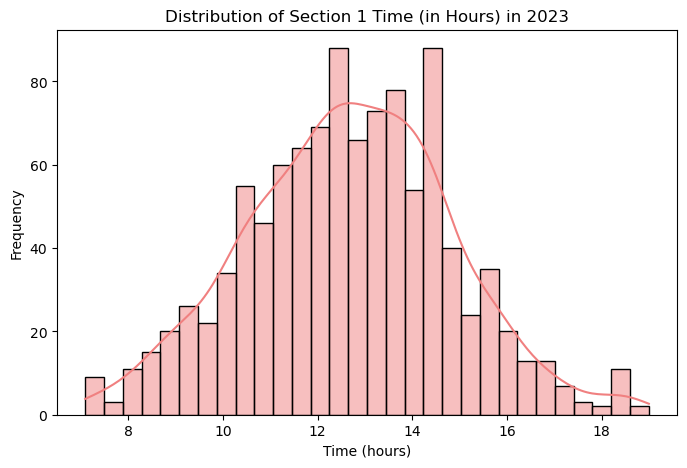

********************************************************************************
Processing column: Time Spent in Valgrisenche
count                         1003
mean     0 days 01:21:15.020937188
std      0 days 00:55:27.360589052
min                0 days 00:00:36
25%         0 days 00:41:59.500000
50%                0 days 01:04:39
75%                0 days 01:49:28
max                0 days 07:31:10
Name: Time Spent in Valgrisenche, dtype: object


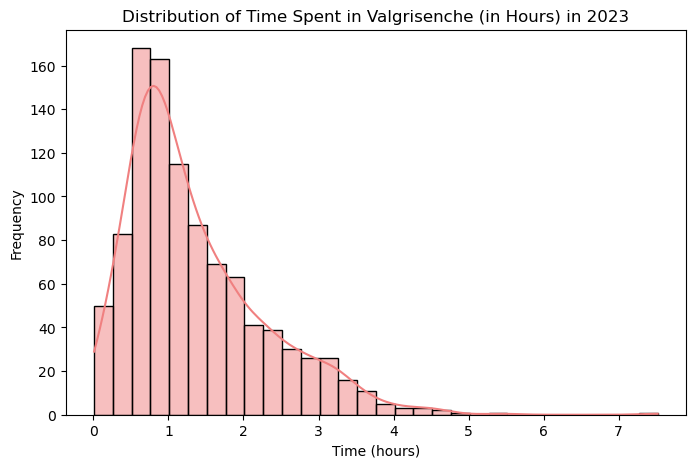

********************************************************************************
Processing column: Section 2 Time
count                          886
mean     0 days 18:30:00.065462753
std      0 days 03:07:46.680286098
min                0 days 09:42:55
25%         0 days 16:30:00.500000
50%                0 days 18:35:59
75%                0 days 20:34:50
max                1 days 02:46:44
Name: Section 2 Time, dtype: object


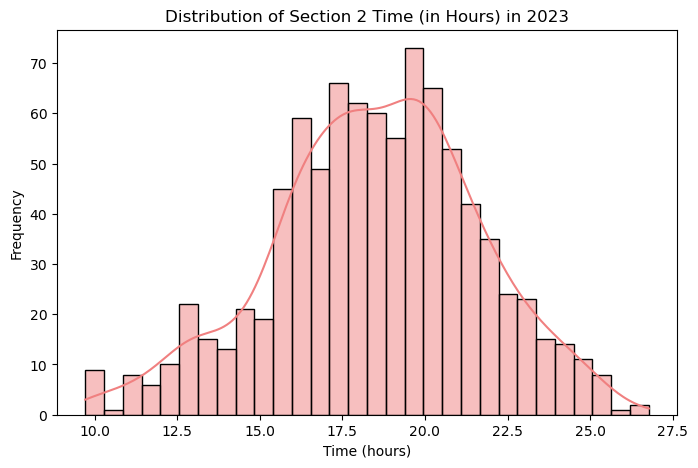

********************************************************************************
Processing column: Time Spent in Cogne
count                          823
mean     0 days 02:33:57.122721749
std      0 days 01:28:51.379066901
min              -1 days +23:59:42
25%         0 days 01:24:49.500000
50%                0 days 02:27:06
75%                0 days 03:36:05
max                0 days 11:32:57
Name: Time Spent in Cogne, dtype: object


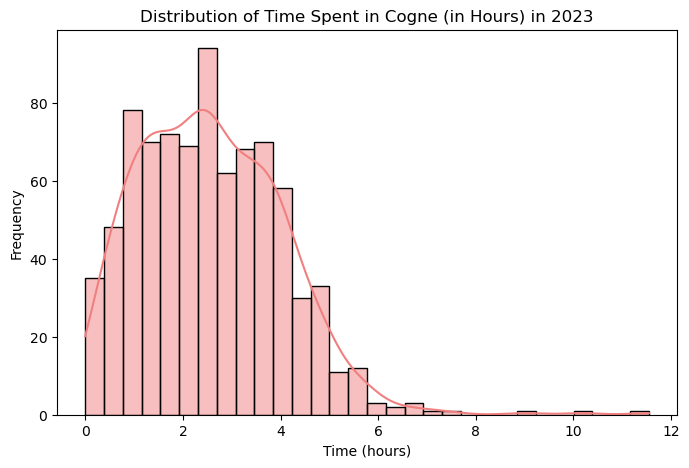

********************************************************************************
Processing column: Section 3 Time
count                          794
mean     0 days 12:29:16.614609571
std      0 days 02:01:02.004749980
min              -1 days +22:37:53
25%         0 days 11:22:55.500000
50%                0 days 12:41:32
75%                0 days 13:49:45
max                0 days 17:30:31
Name: Section 3 Time, dtype: object


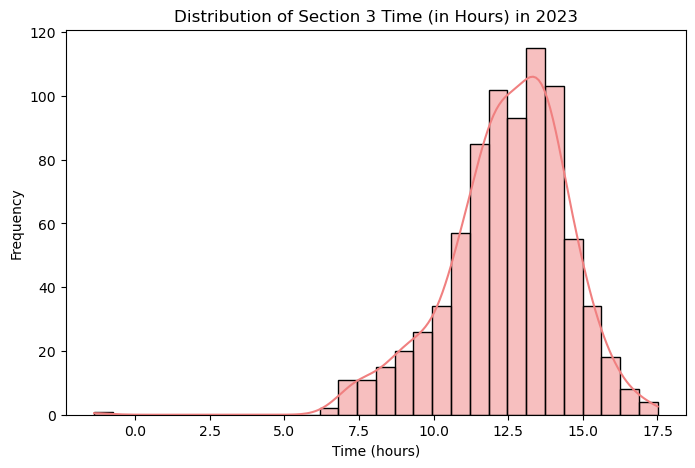

********************************************************************************
Processing column: Time Spent in Donnas
count                          828
mean     0 days 02:40:43.404589371
std      0 days 01:24:58.289866379
min                0 days 00:00:27
25%         0 days 01:42:25.750000
50%                0 days 02:35:32
75%                0 days 03:30:27
max                0 days 18:06:51
Name: Time Spent in Donnas, dtype: object


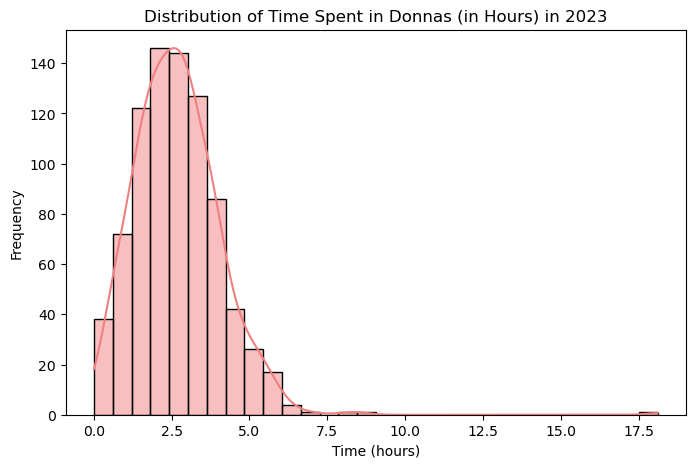

********************************************************************************
Processing column: Section 4 Time
count                          694
mean     0 days 23:32:32.497118155
std      0 days 03:28:20.324667038
min                0 days 11:21:58
25%                0 days 21:14:45
50%                1 days 00:14:18
75%                1 days 02:01:51
max                1 days 07:19:28
Name: Section 4 Time, dtype: object


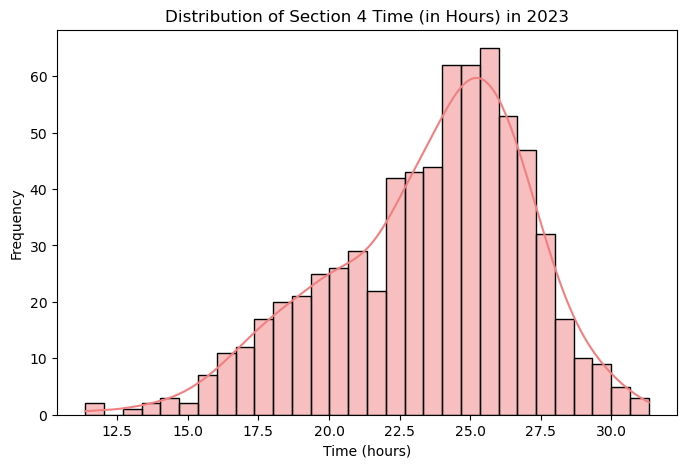

********************************************************************************
Processing column: Time Spent in Gressoney
count                          695
mean     0 days 03:14:26.913669064
std      0 days 01:35:09.165792086
min              -1 days +23:59:26
25%                0 days 02:14:47
50%                0 days 03:13:29
75%         0 days 04:03:28.500000
max                0 days 12:14:56
Name: Time Spent in Gressoney, dtype: object


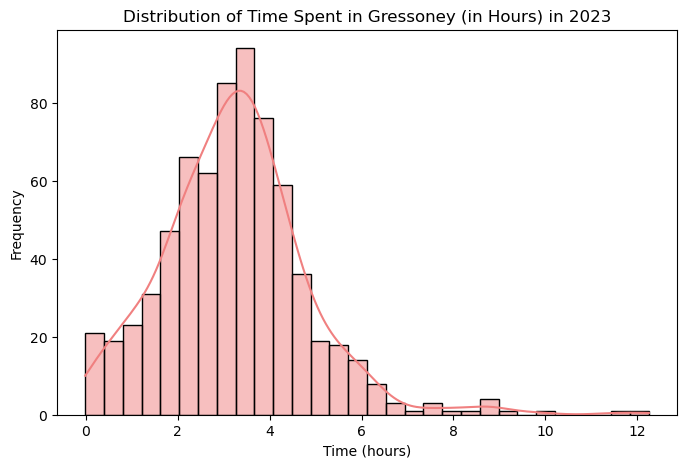

********************************************************************************
Processing column: Section 5 Time
count                          668
mean     0 days 12:35:35.208083832
std      0 days 02:15:05.541661622
min                0 days 07:08:23
25%         0 days 11:01:48.250000
50%                0 days 12:39:06
75%         0 days 14:02:22.750000
max                0 days 22:27:00
Name: Section 5 Time, dtype: object


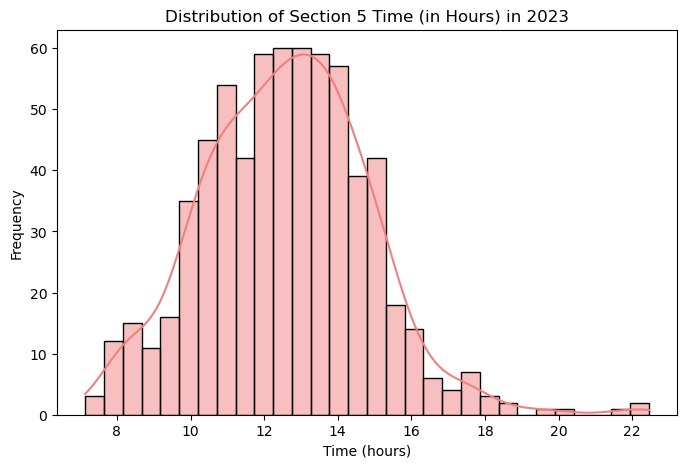

********************************************************************************
Processing column: Time Spent in Valtournenche
count                          665
mean     0 days 02:46:32.264661654
std      0 days 01:28:33.586060979
min                0 days 00:03:38
25%                0 days 01:38:27
50%                0 days 02:46:28
75%                0 days 03:40:32
max                0 days 09:52:00
Name: Time Spent in Valtournenche, dtype: object


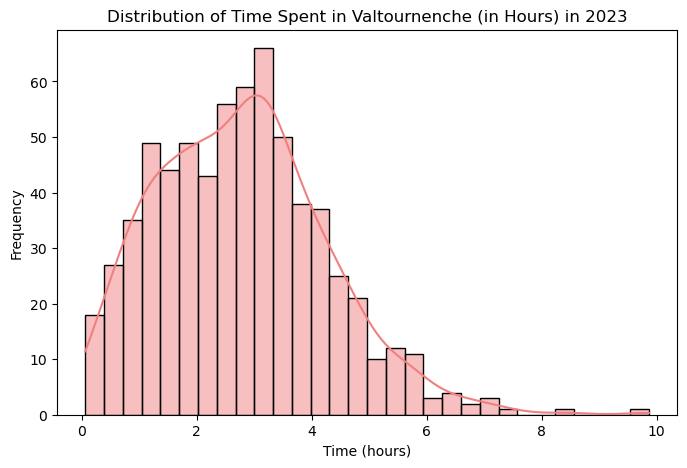

********************************************************************************
Processing column: Section 6 Time
count                          624
mean     0 days 20:03:45.884615384
std      0 days 02:51:24.014907256
min                0 days 11:37:58
25%                0 days 18:11:23
50%                0 days 20:14:13
75%                0 days 21:58:31
max                1 days 05:03:50
Name: Section 6 Time, dtype: object


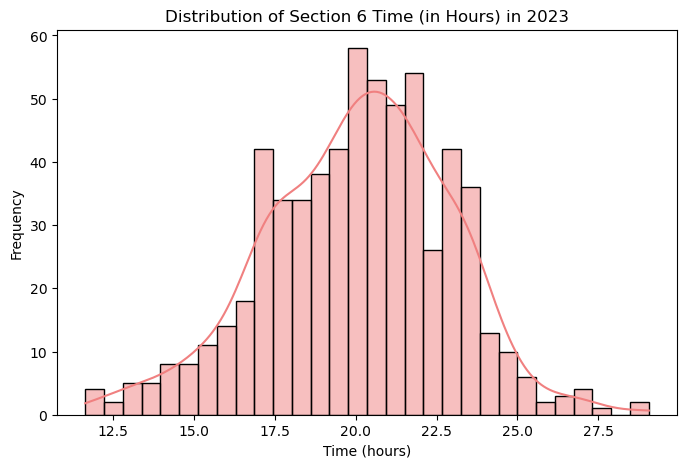

********************************************************************************
Processing column: Time Spent in Ollomont
count                          612
mean     0 days 02:28:25.325163398
std      0 days 01:27:42.756907637
min              -1 days +23:24:09
25%         0 days 01:25:54.500000
50%         0 days 02:18:37.500000
75%         0 days 03:15:50.500000
max                0 days 08:49:43
Name: Time Spent in Ollomont, dtype: object


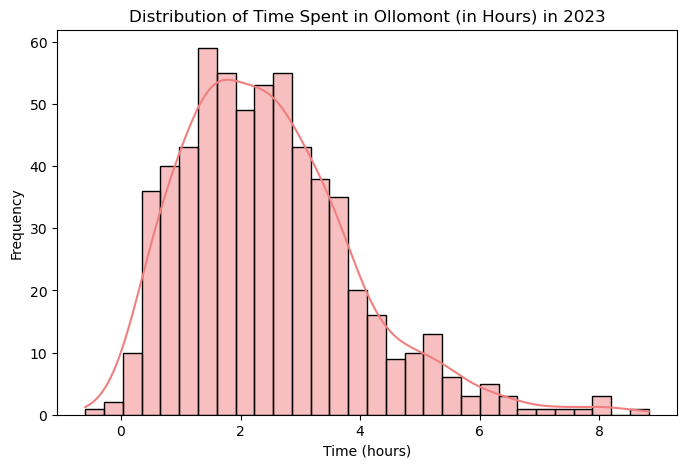

********************************************************************************
Processing column: Section 7 Time
count                          606
mean     0 days 17:01:49.691419141
std      0 days 03:16:45.141012546
min                0 days 10:09:53
25%                0 days 14:36:02
50%                0 days 17:05:56
75%                0 days 19:22:35
max                1 days 17:34:31
Name: Section 7 Time, dtype: object


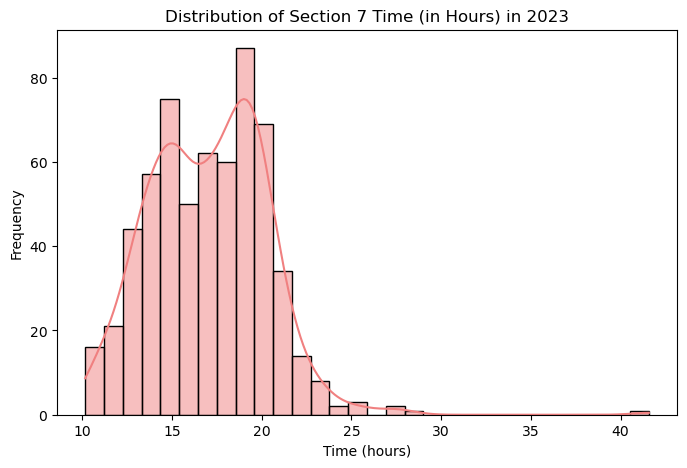

********************************************************************************
Processing column: Duration
count                          622
mean     5 days 09:30:33.818327974
std      0 days 17:06:51.041668145
min                2 days 18:39:16
25%         5 days 01:25:48.750000
50%         5 days 12:26:55.500000
75%                5 days 23:55:49
max                6 days 08:15:44
Name: Duration, dtype: object


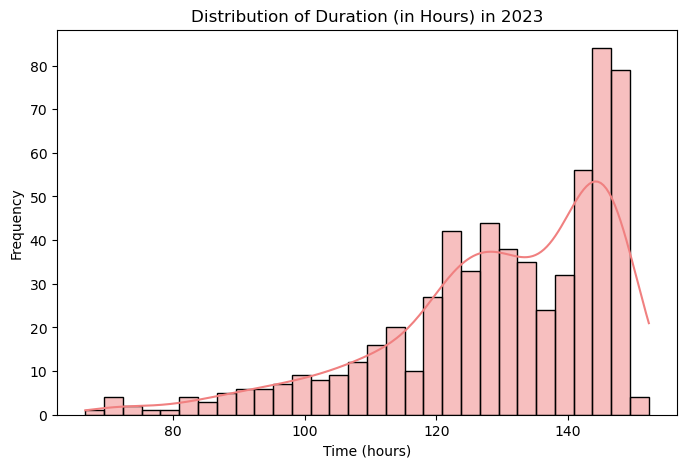

********************************************************************************


In [178]:
# Define the columns to process
time_columns = ['Section 1 Time', 'Time Spent in Valgrisenche', 
                'Section 2 Time', 'Time Spent in Cogne',
                'Section 3 Time', 'Time Spent in Donnas',
                'Section 4 Time', 'Time Spent in Gressoney',
                'Section 5 Time', 'Time Spent in Valtournenche',
                'Section 6 Time', 'Time Spent in Ollomont',
                'Section 7 Time', 'Duration']

# Loop through the columns
for column in time_columns:
    print(f"Processing column: {column}")
    print(tableau_pivoted_TOR330_dates[column].describe())
    
    
    
    
    # Convert to timedelta and get total hours (handling NaT)
    tableau_pivoted_TOR330_dates[f'{column}_hours'] = pd.to_timedelta(
        tableau_pivoted_TOR330_dates[f'{column}'], errors='coerce'
    ).dt.total_seconds() / 3600  # Convert seconds to hours

    # Drop NaN values for histogram visualization
    data_to_plot = tableau_pivoted_TOR330_dates[f'{column}_hours'].dropna()

    # Plot the histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data_to_plot, kde=True, bins=30, color="lightcoral")
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f"Distribution of {column} (in Hours) in {year}")
    plt.xlabel("Time (hours)")
    plt.ylabel("Frequency")
    plt.show()
    
    print('*'*80)


In [76]:
for column in ['Section 1 Time', 'Time Spent in Valgrisenche', 
                'Section 2 Time', 'Time Spent in Cogne',
                'Section 3 Time', 'Time Spent in Donnas',
                'Section 4 Time', 'Time Spent in Gressoney',
                'Section 5 Time', 'Time Spent in Valtournenche',
                'Section 6 Time', 'Time Spent in Ollomont',
                'Section 7 Time', 'Duration']:
    print(tableau_pivoted_TOR330_dates[column].head())

    
    # Convert to timedelta while handling NaT
    tableau_pivoted_TOR330_dates[f'{column}_in_seconds'] = (
        pd.to_timedelta(tableau_pivoted_TOR330_dates[column], errors='coerce')
        .dt.total_seconds()
    )
    
    # Mark missing values explicitly for Tableau
    tableau_pivoted_TOR330_dates[f'{column}_in_seconds'] = (
        tableau_pivoted_TOR330_dates[f'{column}_in_seconds']
        .fillna('Missing')  # Replace NaT with 'Missing'
    )
            
    print(f'{column}_in_seconds')
    print('*'*20)   


1     0 days 07:05:31
643   0 days 07:15:46
5     0 days 07:16:48
19    0 days 07:16:45
629   0 days 07:22:05
Name: Section 1 Time, dtype: timedelta64[ns]
Section 1 Time_in_seconds
********************
1     0 days 00:05:00
643   0 days 00:04:04
5     0 days 00:05:37
19    0 days 00:05:42
629   0 days 00:05:05
Name: Time Spent in Valgrisenche, dtype: timedelta64[ns]
Time Spent in Valgrisenche_in_seconds
********************
1     0 days 09:52:40
643   0 days 09:42:55
5     0 days 10:11:16
19    0 days 10:08:11
629   0 days 10:08:19
Name: Section 2 Time, dtype: timedelta64[ns]
Section 2 Time_in_seconds
********************
1     0 days 00:10:26
643   0 days 00:10:54
5     0 days 00:19:11
19    0 days 00:18:55
629   0 days 00:16:39
Name: Time Spent in Cogne, dtype: timedelta64[ns]
Time Spent in Cogne_in_seconds
********************
1     0 days 06:35:28
643   0 days 06:36:39
5     0 days 06:59:04
19    0 days 07:04:46
629   0 days 07:06:06
Name: Section 3 Time, dtype: timedelta64[ns]
Sec

In [77]:
tableau_pivoted_TOR330_dates.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Status1', 'Wave', 'Retired', 'Retired_Section',
       'new_Start Date', 'Section 1 Time', 'Time Spent in Valgrisenche',
       'Section 2 Time', 'Time Spent in Cogne', 'Section 3 Time',
       'Time Spent in Donnas', 'Section 4 Time', 'Time Spent in Gressoney',
       'Section 5 Time', 'Time Spent in Valtournenche', 'Section 6 Time',
       'Time Spent in Ollomont', 'Section 7 Time', 'Duration',
       'Section 1 Time_hours', 'Time Spent in Valgrisenche_hours',
       'Section 2 Time_hours', 'Time Spent in Cogne_hours',
       'Section 3 Time_hours', 'Time Spent in Donnas_hours',
       'Section 4 Time_hours', 'Time Spent in Gressoney_hours',
       'Section 5 Time_hours', 'Time Spent in Valtournenche_hours',
       'Section 6 Time_hours', 'Time Spent in Ollomont_hours',
       'Section 7 Time_hours', 'Duration_hours', 'Section 1 Time_in_seconds',
       'Time Spent in Valgrisenche_in_seconds', '

In [78]:
tableau_pivoted_TOR330_dates = tableau_pivoted_TOR330_dates[[
    
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Status1', 'Wave', 'Retired', 'Retired_Section',
       'new_Start Date', 'Section 1 Time_in_seconds',
       'Time Spent in Valgrisenche_in_seconds', 'Section 2 Time_in_seconds',
       'Time Spent in Cogne_in_seconds', 'Section 3 Time_in_seconds',
       'Time Spent in Donnas_in_seconds', 'Section 4 Time_in_seconds',
       'Time Spent in Gressoney_in_seconds', 'Section 5 Time_in_seconds',
       'Time Spent in Valtournenche_in_seconds', 'Section 6 Time_in_seconds',
       'Time Spent in Ollomont_in_seconds', 'Section 7 Time_in_seconds',  'Duration_in_seconds'
]]

### Saving for Tableau

In [79]:
tableau_pivoted_TOR330_dates.to_excel(f'{race} Data/tableau_{race}_aid_stations_{year}.xlsx' )